In [1]:
# --- Imports ---
import matlab.engine

In [2]:
# Start the MATLAB engine
# eng = matlab.engine.start_matlab()
eng = matlab.engine.start_matlab("-nodisplay -nosplash -nodesktop -nojvm") # Start MATLAB without GUI (headless) for faster execution
# eng = matlab.engine.start_matlab("-desktop")


In [3]:
# --- Run MATLAB code ---
# call function [x, y] = matlab_test(a, b)
a = 10
b = 5
[x, y] = eng.matlab_test(a, b, nargout=2)

Sum of 10 and 5 is 15
Matrix:
     1     2     3
     4     5     6
     7     8     9

Eigenvalues of the matrix:
   16.1168
   -1.1168
   -0.0000



In [4]:
# print(f"x = {x}")
# print(f"y = {y}")
# convert MATLAB output to Python list
import numpy as np
x = np.array(x)
y = np.array(y)
y[0]

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ])

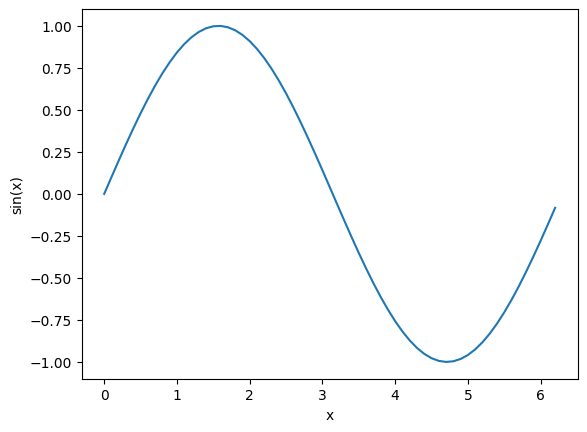

In [5]:
import matplotlib.pyplot as plt
plt.plot(x[0], y[0])
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [6]:
# Quit the MATLAB engine
eng.quit()

In [7]:
import os
import subprocess

matlab_root = "/Applications/MATLAB_R2024a.app"

# Save the current working directory
current_dir = os.getcwd()

# Path to the setup.py script for MATLAB Engine API for Python
setup_path = os.path.join(matlab_root, "extern", "engines", "python")
assert os.path.exists(setup_path), f"Setup path does not exist: {setup_path}"

# Change to the setup directory
os.chdir(setup_path)

# Run the setup.py script to install the MATLAB Engine API
print("Installing MATLAB Engine API for Python...")

# Make the build directory in the user's home directory
home_dir = os.path.expanduser("~")
build_dir = os.path.join(home_dir, "build_matlab_engine")

# Ensure the build directory is writable
subprocess.run(["mkdir", "-p", build_dir], check=True)
subprocess.run(["chmod", "-R", "u+w", build_dir], check=True)

subprocess.run([f"python3", "setup.py", "build", "--build-base={build_dir}, install"], check=True)


Installing MATLAB Engine API for Python...


mkdir: /Users/bkyanjo3/build_matlab_engine: File exists


CalledProcessError: Command '['mkdir', '-p', '/Users/bkyanjo3/build_matlab_engine']' returned non-zero exit status 1.

In [1]:
import os
import subprocess

matlab_root = "/Applications/MATLAB_R2024a.app"

# Save the current working directory
current_dir = os.getcwd()

# Path to the setup.py script for MATLAB Engine API for Python
path_py = os.path.join(matlab_root, "extern", "engines", "python")
setup_path = os.path.join(path_py, "setup.py")
dist_path = os.path.join(path_py, "dist")
# setup_path = os.path.join(matlab_root, "extern", "engines", "python", "setup.py")

# create a new build directory
subprocess.run(["mkdir", "-p", "build"], check=True)

# copy the setup.py file to the build directory
subprocess.run(["cp", "-f", setup_path, "build"], check=True)
subprocess.run(["cp", "-rf" , dist_path, "build"], check=True)

# get path to the build directory
build_dir = os.path.join(current_dir, "build")
setup_path_new = os.path.join(current_dir, "build", "setup.py")

# change to the build directory
os.chdir(path_py)

# Run the setup.py script to install the MATLAB Engine API
print("Installing MATLAB Engine API for Python...")
subprocess.run(["python3", setup_path_new, "build","-b",build_dir, "bdist_egg", "-d", build_dir])



# Run the setup.py script to install the MATLAB Engine API
# subprocess.run(["python3", "setup.py", "install"], check=True)
# change back to the original directory
# os.chdir(current_dir)

Installing MATLAB Engine API for Python...


error: could not create 'dist/matlabengine.egg-info': Permission denied


CompletedProcess(args=['python3', '/Users/bkyanjo3/da_project/Data_assimilation_project/applications/issm/matlab2python/build/setup.py', 'build', '-b', '/Users/bkyanjo3/da_project/Data_assimilation_project/applications/issm/matlab2python/build', 'bdist_egg', '-d', '/Users/bkyanjo3/da_project/Data_assimilation_project/applications/issm/matlab2python/build'], returncode=1)

In [2]:
!ls build/

lib
